curveOrder= 3
nv= 105  nedge= 434  nfacet= 570  ne= 239


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 3368    Nonzeros= 158502
shift parameter= 1.0
minimum residual= 9.268443686467588e-09  at iteraions:  45


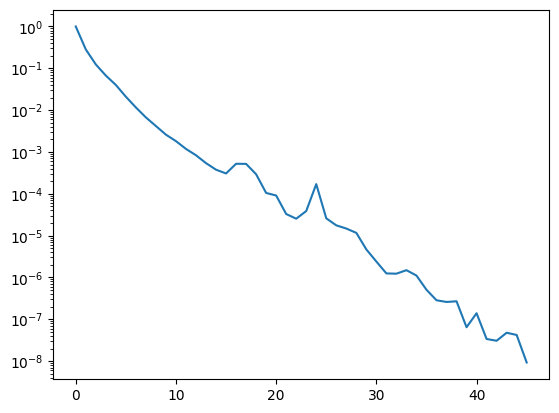

ICCG calculation time (sec): 0.0420256999996127
経過時間: 1.2773 秒  
center magnetic field =  ((0.04648030075296482+0.027628443357823974j), (9.044899402628876e-15-9.915080012003824e-16j), (0.4847463461881366+0.8352379560194965j))   
 Magnetic energy in conductor= (26146.590373414005-18569.488874054114j)  Joule loss=  (16802.860226759993+31796.38000918764j)
**** B field (real)****


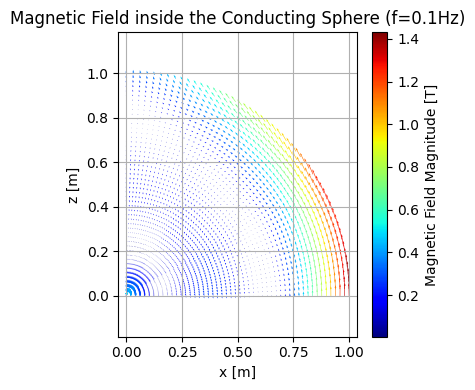

**** B field (imag)****


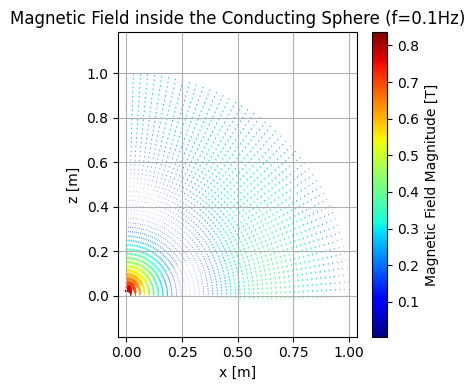

**** J field (real)****


C:\EMSolution\EMSolpy5\EMPY_Analysis\EddyCurrent\..\Static\Static_Method.py:185: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Z, Jphi, cmap='coolwarm')


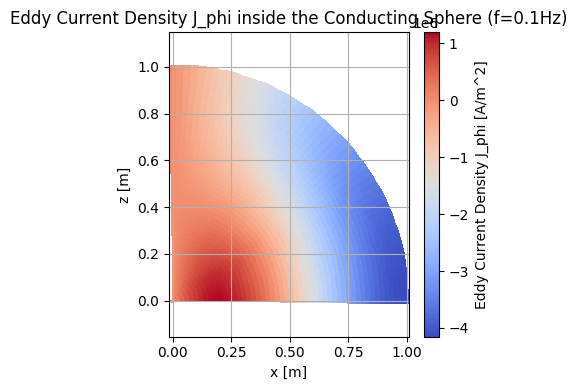

**** J field (imag)****


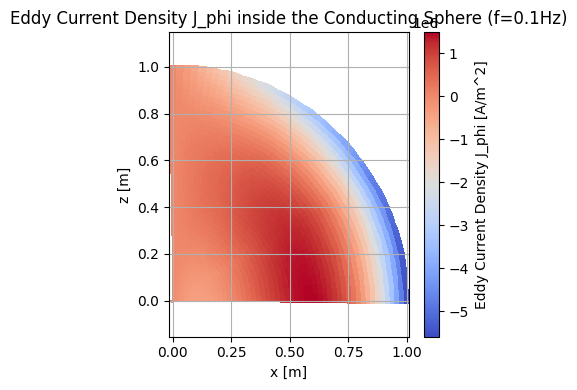

In [1]:
from ngsolve import *
from netgen.occ import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo  
sys.path.append(r'..\Static') 
from Omega_ReducedOmega import Omega_ReducedOmega_Method
from A_ReducedOmega import A_ReducedOmega_Method
from A_ReducedA import A_ReducedA_Method
from A_Phi_ReducedA import A_Phi_ReducedA_Method
sys.path.append(r'..\bin\Release') 
from EMPY_Field import *
sys.path.append(r'..\model')
from SphereMesh import SphereMesh
from BathPlateModel import BathPlateModel
from Team7Model import Team7Model

#coil=UNIF(0,0,1,0)
#model=CubeMesh(msize=meshsize.coarse, curveOrder=3, rKelvin=5)
model=SphereMesh(mur=1, sigma=5.e7, msize=meshsize.coarse, curveOrder=3, rKelvin=2)
#model=BathPlateModel(holes=2, outerBox="sphere", boxx=0.2, boxy=0.2, boxz=0.2,  msize=meshsize.very_coarse, sigma=0.3278e8, rKelvin=0.15)
#model=Team7Model()
mesh=model.mesh
Draw(mesh)
#DrawGeo(model.geo)

feOrder=3
#cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0", Kelvin="on")
cal=A_Phi_ReducedA_Method(model, jomega=True, freq=0.1)
cal.Calc( feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=False, tol=1.e-8)
cal.CalcResult(model, plotBFieldonLine=False, drawFields=True, pltBField=True)
#maxerror, error=cal.CalcError()
#cal.CalcError()


Mathematica  
Um=24109.6 - 17110.9 I  
Pj=18305.3 + 32993.2 I  

very caorse ne=44    
Um=29152.977730838058-20618.858657114157j    
Pj=15048.519194226223+33252.89982907082j

coarse  
Um=26146.590373414005-18569.488874054114j  
Pj=16802.860226759993+31796.38000918764j  

moderate  
Um=24143.289346728347-17094.02370193622j   
Pj=18318.698319999978+32968.13309954526j   

fine    
Um=24121.69360674798-17104.760817407318j   
Pj=18309.888121815544+32984.582040425186j      

very_fine  ne= 5004  
Um=24111.180175803653-17109.842896500486j
Pj=18306.565250782296+32992.76067689554j   

Adaptive iteration:  1
max(eta_t)= 405.1616281897421   max(eta_j)= 39.609220133618464
 maxerr =  416.5743935291706 2.289121557945787 24.25933238868065
ndof= 4215  maxerr =  416.5743935291706
Refined mesh: nv= 539  nedge= 3251  nfacet= 4762  ne= 1912


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 27239    Nonzeros= 1370121
shift parameter= 1.0
minimum residual= 8.47613839768179e-09  at iteraions:  102


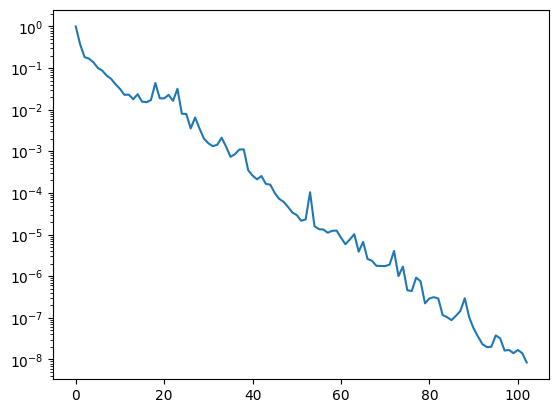

ICCG calculation time (sec): 0.7011766000005082
経過時間: 2.1684 秒  
center magnetic field =  ((-4.934245104498425e-15+1.7499882089080339e-15j), (-0.0030945680379866236-0.011386865173861845j), (-0.09216445920839758+0.05973389239979184j))   
 Magnetic energy in conductor= (24360.439745829277-17077.44647459417j)  Joule loss=  (18313.187874925774+32800.99249200628j)
**** B field (real)****


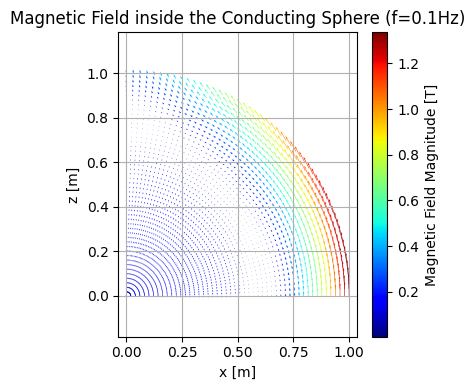

**** B field (imag)****


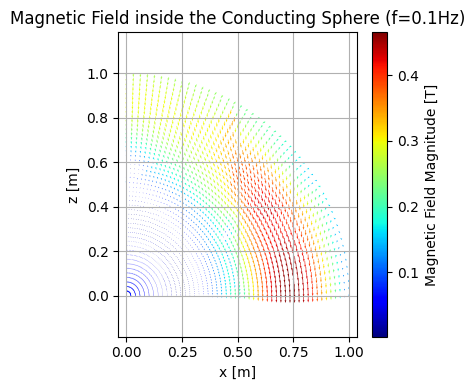

**** J field (real)****


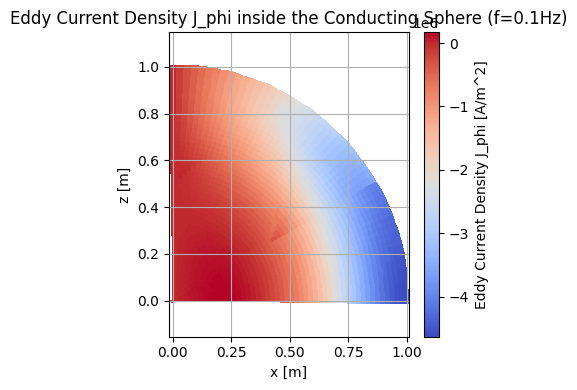

**** J field (imag)****


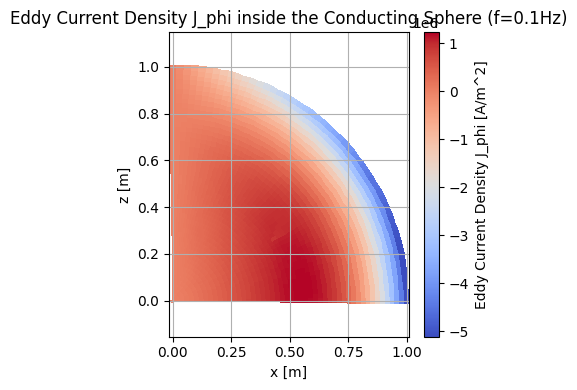

Adaptive iteration:  2
max(eta_t)= 117.2382792382972   max(eta_j)= 33.51383659507749
 maxerr =  138.58640999524815 0.5888777333752073 0.828664384899131
ndof= 31130  maxerr =  138.58640999524815
Refined mesh: nv= 3356  nedge= 23373  nfacet= 36826  ne= 15296


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 219154    Nonzeros= 11381344
shift parameter= 1.01
minimum residual= 9.661853002634149e-09  at iteraions:  208


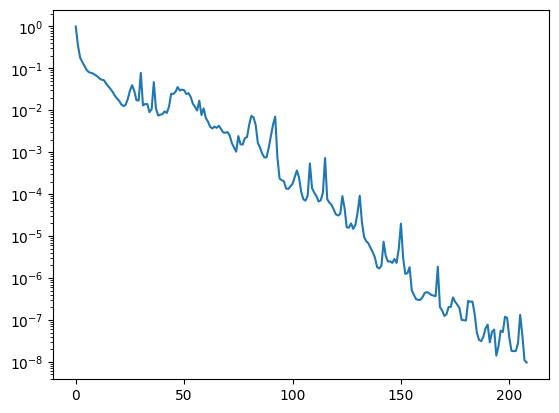

ICCG calculation time (sec): 12.810641600000054
経過時間: 21.0980 秒  
center magnetic field =  ((0.0002805243670711716+9.131007992796103e-06j), (9.883660412345321e-05-2.5958397334376536e-05j), (-0.12630876152639303+0.07192720156320609j))   
 Magnetic energy in conductor= (24127.019947410037-17105.428182676373j)  Joule loss=  (18312.2713447268+32983.377867687435j)
**** B field (real)****


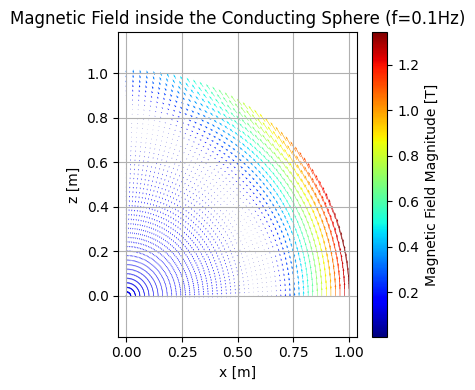

**** B field (imag)****


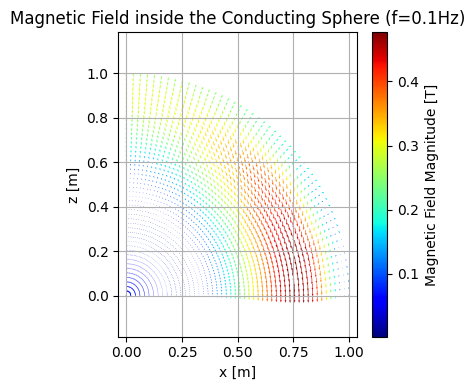

**** J field (real)****


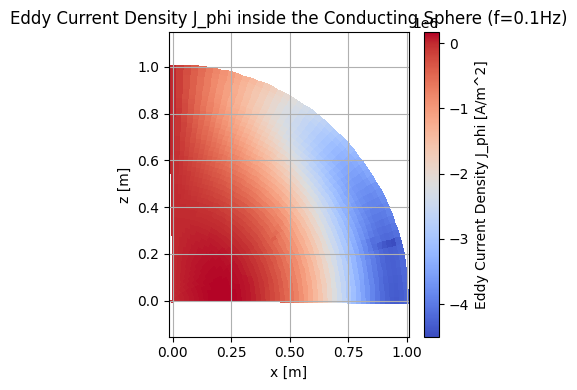

**** J field (imag)****


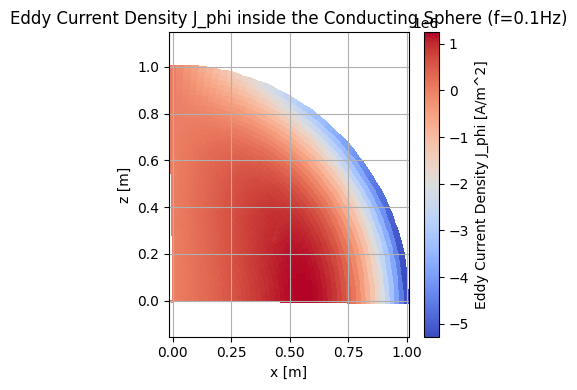

Adaptive iteration:  3
max(eta_t)= 35.55825712500874   max(eta_j)= 1.706585005993318
 maxerr =  36.10002705369866 0.13290992593813195 0.11206135567789445
ndof= 237281  maxerr =  36.10002705369866
Refined mesh: nv= 23478  nedge= 175105  nfacet= 287450  ne= 122368


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

 fespace Dof >  dofLimit, DOF= 1850535


In [2]:

iter=0
#for iter in range(6):
while True:
    iter=iter+1
    print("Adaptive iteration: ",iter) 
    maxerror, error=cal.CalcError()
    cal.Refine(maxerror, error)
    Draw(mesh)
    cal=A_Phi_ReducedA_Method(model, jomega=True, freq=0.1)
    rt=cal.Calc(feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=False, tol=1.e-8)
    if rt==0: break
    cal.CalcResult(model, plotBFieldonLine=False, drawFields=True, pltBField=True)
    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")



In [3]:
import ngsolve
print(ngsolve.__version__)

6.2.2402


Mathematica  
Um=24109.6 - 17110.9 I                                                              Pj=18305.3 + 32993.2 I  
Magnetic energy in conductor= (29152.977730838058-20618.858657114157j)  Joule loss=  (15048.519194226223+33252.89982907082j)
Magnetic energy in conductor= (37828.302384307855-26242.38463379714j)  Joule loss=  (25974.64687238716+48810.56282285748j)
Magnetic energy in conductor= (24058.853347047072-16708.54626287997j)  Joule loss=  (17734.066554176097+32439.74892019239j)  